# Activity 2: Fractal Art
In this activity,  students will edit this Jupyter notebook to create fractal art. You do not need detailed knowledge of Qiskit or fractals, and all necessary code is already written. Students just need to edit the quantum circuits to their liking.


## Install all necessary libraries

In [3]:
!pip3 install numpy
!pip3 install matplotlib
!pip3 install qiskit
!pip3 install qiskit-aer
!pip3 install qiskit-ibm-runtime
!jupyter labextension enable --user ibm_quantum_widgets
!jupyter labextension enable ibm_quantum_widgets
!pip install pylatexenc
!pip show pylatexenc
!pip uninstall qiskit --upgrade

Unrecognized alias: 'user', it will have no effect.
Name: pylatexenc
Version: 2.10
Summary: Simple LaTeX parser providing latex-to-unicode and unicode-to-latex conversion
Home-page: https://github.com/phfaist/pylatexenc
Author: Philippe Faist
Author-email: philippe.faist@bluewin.ch
License: MIT
Location: /opt/conda/lib/python3.11/site-packages
Requires: 
Required-by: 

Usage:   
  pip uninstall [options] <package> ...
  pip uninstall [options] -r <requirements file> ...

no such option: --upgrade


## Import necessary libraries

In [4]:
# Importing standard python libraries
import numpy as np
from math import pi,sqrt
import matplotlib.pyplot as plt

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, QuantumRegister
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import Aer
#from qiskit.tools.jupyter import *
from qiskit.visualization import * # plot_bloch_multivector
#from ibm_quantum_widgets import * # CircuitComposer
from qiskit import QuantumCircuit
from qiskit_aer import QasmSimulator
from qiskit.quantum_info import Statevector
#from ibm_quantum_widgets import CircuitComposer

## Build your quantum circuit

### 1. You can decide the number of qubits in your circuit


Here is code an example
* `circuit = QuantumCircuit(2,2)`
l;
To change the size of your circuit, edit the numbers **(2,2)**

For example
* **(1,1)** for 1 qubit 
* **(3,3)** for 1 qubit 

### 2. Add superposition to a qubit with a Hadamard gate 

Here is code an example

`circuit.h(0)`

**(0)** represents the number of the desired qubit

Note:
* The qubit count starts at 0 not 1

### 3. Create superposition between two qubits 

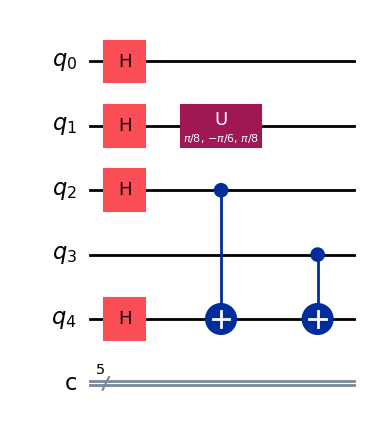

In [29]:
# Start with an one qubit quantum circuit yielding a nice fractal. Change the circuit as you like.
circuit = QuantumCircuit(5,5) 

circuit.h(1)
circuit.h(0)
circuit.h(4)
circuit.h(2)

circuit.cx(2,4)
circuit.cx(3,4)




#circuit.cx(2,4)

#circuit.u(pi/4, -pi/3, pi/8, 0)
circuit.u(pi/8, -pi/6, pi/8, 1)
#circuit.u(pi/12, -pi/9, pi/2, 0)
#circuit.u(pi/8, -pi/6, pi/8, 2)

#circuit.rx(pi/2, 1)
#circuit.measure(1,0)
#circuit.measure(2,0)

circuit.draw(output="mpl")

## Algorithm that creates fractal representation of your circuit

In [30]:
# Run the circuit with the state vector simulator to obtain a noise-free fractal.
qc1 = circuit

backend = Aer.get_backend('statevector_simulator')
#out = execute(qc1,backend).result().get_statevector()
out = backend.run(qc1).result().get_statevector()
#print(out)

# Extract the first element of the state vector as z0 and the second element as z1.
z0 = out.data[0]
z1 = out.data[1]


# Goal: One complex number for the Julia set fractal. 
if z1.real != 0 or z1.imag != 0:
    z = z0/z1
    z = round(z.real, 2) + round(z.imag, 2) * 1j
else:
     z = 0 

print("z= ",z)

# Define the size
size = 1000
heightsize = size
widthsize = size


def julia_set(c=z, height=heightsize, width=widthsize, x=0, y=0, zoom=1, max_iterations=100):

    # To make navigation easier we calculate these values
    x_width = 1.5
    y_height = 1.5*height/width
    x_from = x - x_width/zoom
    x_to = x + x_width/zoom
    y_from = y - y_height/zoom
    y_to = y + y_height/zoom
    
    # Here the actual algorithm starts and the z paramter is defined for the Julia set function
    x = np.linspace(x_from, x_to, width).reshape((1, width))
    y = np.linspace(y_from, y_to, height).reshape((height, 1))
    z = x + 1j * y
    
    # Initialize c to the complex number obtained from the quantum circuit
    c = np.full(z.shape, c)
    
    # To keep track in which iteration the point diverged
    div_time = np.zeros(z.shape, dtype=int)
    
    # To keep track on which points did not converge so far
    m = np.full(c.shape, True, dtype=bool)
    
    for i in range(max_iterations):
        z[m] = z[m]**2 + c[m] 
        m[np.abs(z) > 2] = False
        div_time[m] = i
    return div_time

z=  (1+0j)


## Pick the color style of your fractal art

There are many different color map choices. A few options are listed.

* Look at this link to see all options:
* <a href="https://matplotlib.org/stable/users/explain/colors/colormaps.html" target="_blank">Color Map List</a>


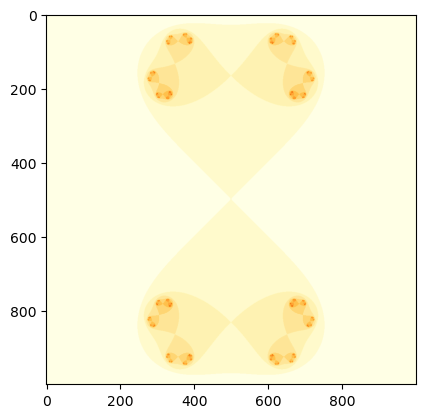

In [31]:
# plot the Julia set fractal
plt.imshow(julia_set(), cmap='YlOrBr') # prism, flag, tab20b, viridis', 'plasma', 'inferno', 'magma', 'cividis'
plt.show()

